# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Dr **Tuan Nguyen** | Tuan.Ng@monash.edu <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
Surname: **Sunthornjittanon**  <br/>
Firstname: **Pichaphop**    <br/>
Student ID: **31258301**    <br/>
Email: **psun0009@student.monash.edu**    <br/>
Your tutorial time: **Wed, Fri 16.00-18.00**    <br/>
***

## <span style="color:#0b486b">Assignment 02: Neural Embedding and Sequence Modelling</span>
### Due: <span style="color:red">11:59pm 6 February 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to you final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for your to complete Assignment 2. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, word embedding and text analytics. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>
* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **four** parts:

* Part 1: Questions on downloading and preprocessing data **[10 points]**
* Part 2: Questions on using Word2Vect to transform texts to vectors **[20 points]**
* Part 3: Coding assessment on Text CNN for sequence modeling and neural embedding **[10 points]**
* Part 4: Coding assessment on RNNs for sequence modeling and neural embedding **[60 points]**


**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Weeks 7 to 10. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment02_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment02_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment02_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment02_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

## <span style="color:#0b486b">Set random seeds</span>

We start with importing tensorflow and numpy and setting random seeds for TF and numpy. You can use any seeds you prefer.

In [1]:
# Import numpy and tensorflow library
import numpy as np
import tensorflow as tf

# Set seed
tf.random.set_seed(6789)
np.random.seed(6789)

## <span style="color:#0b486b">Part 1: Download and preprocess the data</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 points]<span></div>

The dataset we use for this assignment is a question classification dataset for which the train set consists of $500$ questions belonging to 6 coarse question categories including:
- abbreviation (ABBR), 
- entity (ENTY), 
- description (DESC), 
- human (HUM), 
- location (LOC) and 
- numeric (NUM).


Preprocessing data is an inital and important step in any machine learning or deep learning projects. The following *DataManager* class helps you to download data and preprocess data for the later steps of a deep learning project. 

In [2]:
# Import libraries
import os
import zipfile
import collections
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

class DataManager:
    def __init__(self, verbose=True, maxlen= 50, random_state=6789):
        self.verbose = verbose
        self.max_sentence_len = 0
        self.str_questions = list()
        self.str_labels = list()
        self.numeral_labels = list()
        self.maxlen = maxlen
        self.numeral_data = list()
        self.random_state = random_state
        self.random = np.random.RandomState(random_state)
        
    @staticmethod
    def maybe_download(dir_name, file_name, url, verbose= True):
        
        # Check whether directory exists or not 
        if not os.path.exists(dir_name):
            
            # If not make directory
            os.mkdir(dir_name)
            
        # If the file does not exist, retrive URL (Download)
        if not os.path.exists(os.path.join(dir_name, file_name)):
            urlretrieve(url + file_name, os.path.join(dir_name, file_name))
        
        # Print out download status if verbose is True 
        if verbose:
            print("Downloaded successfully {}".format(file_name))
    
    def read_data(self, dir_name, file_names):
        
        # Initialise lists
        self.str_questions= list(); self.str_labels= list()
        
        # In each file names (["train_1000.label", "TREC_10.label"])
        for file_name in file_names:
            # Create file path
            file_path= os.path.join(dir_name, file_name)
            
            # Open the file in read mode
            with open(file_path, "r", encoding="latin-1") as f:
                
                # In each row
                for row in f:
                    
                    # Split the text using :
                    row_str= row.split(":")
                    
                    # Create labels and questions variables from row_str
                    label, question= row_str[0], row_str[1]
                    
                    # Lower the text
                    question= question.lower()
                    
                    # Append the labels in self.str_labels list
                    self.str_labels.append(label)
                    
                    # Append the question in self.str_questions
                    self.str_questions.append(question[0:-1])
                    
                    # If sentence length is greater than max sentenc length
                    if self.max_sentence_len < len(self.str_questions[-1]):
                        
                        # Replace the new max length
                        self.max_sentence_len= len(self.str_questions[-1])
         
        # turns labels into numbers
        le= preprocessing.LabelEncoder()
        
        # Fit the LabelEncoder into label (Change str to numbers)
        le.fit(self.str_labels)
        
        # Transform the LabelEncoder into label (Change str to numbers) and convert into np array
        self.numeral_labels = np.array(le.transform(self.str_labels))
        
        # Store the class in the dataset
        self.str_classes= le.classes_
        
        # Store the number of classes
        self.num_classes= len(self.str_classes)
        
        # If verbose is True, Print the info
        if self.verbose:
            print("\nTraining size: {}".format(len(self.str_questions)))
            print("\nSample questions... \n")
            print(self.str_questions[0:5])
            print("Labels {}\n\n".format(self.str_classes))
    
    def manipulate_data(self):
        
        # Initialise Tokenizer class
        tokenizer = tf.keras.preprocessing.text.Tokenizer()
        
        # Fit on the list of string self.str_questions
        tokenizer.fit_on_texts(self.str_questions)
        
        # Transform to sequences of indices
        self.numeral_data = tokenizer.texts_to_sequences(self.str_questions)
        
        # Truncate the sentence at the end and pad with 0 if the length is less than maxlen
        self.numeral_data = tf.keras.preprocessing.sequence.pad_sequences(self.numeral_data, padding='post', truncating= 'post', maxlen= self.maxlen)
        
        # Store words and their index 
        self.word2idx = tokenizer.word_index
        
        # Store dict word : index
        self.word2idx = {k:v for k,v in self.word2idx.items()}
        
        # Store dict index : word
        self.idx2word = {v:k for k,v in self.word2idx.items()}
        
        # Store vocab size
        self.vocab_size = len(self.word2idx)
    
    def train_valid_split(self, train_ratio=0.9):
        
        # Randomise index 
        idxs = np.random.permutation(np.arange(len(self.str_questions)))
        
        # Get the training size
        train_size = int(train_ratio*len(idxs)) +1
        
        # Split data into training and validation set (raw text)
        self.train_str_questions, self.valid_str_questions = self.str_questions[0:train_size], self.str_questions[train_size:]
        
        # Split data into training and validation set (numerical)
        self.train_numeral_data, self.valid_numeral_data = self.numeral_data[0:train_size], self.numeral_data[train_size:]
        
        # Split data into training and validation labels (numerical)
        self.train_numeral_labels, self.valid_numeral_labels = self.numeral_labels[0:train_size], self.numeral_labels[train_size:]
        
        # Convert training data into tf dataset object
        self.tf_train_set = tf.data.Dataset.from_tensor_slices((self.train_numeral_data, self.train_numeral_labels))
        
        # Convert validation data into tf dataset object
        self.tf_valid_set = tf.data.Dataset.from_tensor_slices((self.valid_numeral_data, self.valid_numeral_labels))

In [3]:
# Print Loading data
print('Loading data...')

# Download the data (if it's not exist yet)
DataManager.maybe_download("Data", "train_1000.label", "http://cogcomp.org/Data/QA/QC/")
DataManager.maybe_download("Data", "TREC_10.label", "http://cogcomp.org/Data/QA/QC/")

# Initialise Data manager object
dm = DataManager(maxlen=100)

# Read the data
dm.read_data("Data/", ["train_1000.label", "TREC_10.label"])   # read data

Loading data...
Downloaded successfully train_1000.label
Downloaded successfully TREC_10.label

Training size: 1500

Sample questions... 

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?']
Labels ['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']




In [4]:
# Manipulate the data
dm.manipulate_data()

# Split the training and testing dataset
dm.train_valid_split(train_ratio=0.8)

You now have a data manager, named *dm* containing the training and validiation sets in both text and numeric forms. Your task is to play around and read this code to figure out the meanings of some important attributes that will be used in the next parts.

#### <span style="color:red">**Question 1.1**</span> 
**What is the purpose of `self.train_str_questions` and `self.train_numeral_labels`? Write your code to print out the first five questions with labels in the training set.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

# Your answer here

After we read the file, we split the data  into self.train_str_questions and self.str_labels to seperate between the questions ( features) and their categories (labels). The self.train_str_questions is further pre-processed by lowering the case, which return the list of strings/questions. On the other hand, self.str_labels demonstrates question categories in string format so we encode the string categories into numerical labels using preprocessing.LabelEncoder(), which returns list of numerical values (0-5) representing each question category.

The purpose of creating self.train_str_questions is to create the list of sentences as string that will be used for data processing to create feature in the later sections.

The purpose of creating self.train_numeral_labels is to encode and get label in numerical form so that we can use this to test and train in the later sections.

In [5]:
#Your code here
print('\nPrint self.train_str_questions \n')
print(dm.train_str_questions[:5])

print('\nPrint self.train_numeral_labels \n')
print(dm.train_numeral_labels[:5])


Print self.train_str_questions 

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?']

Print self.train_numeral_labels 

[1 2 1 2 0]


#### <span style="color:red">**Question 1.2**</span> 
**What is the purpose of `self.train_numeral_data`? Write your code to print out the first five questions in the numeric format with labels in the training set.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

# Your answer here

After we get the list of questions/string in question 1.1, we transform it into the matrix representation/2 dimensional array, which machine can understand unlike the string. To transform into matrix, we initially use Tokenizer to split the sentence in to each word and encode each word into numerical representation. Since each sentence have different length, we truncate the sentence at the end and pad with 0 if the length is less than maximum length that we set using sequence.pad_sequences. As a result, we get the numerical matrix, which each row represents each sentence.

Then, we split the data into training and validation datasets , and self.train_numeral_data is a training dataset that is in numerical matrix representation form.



In [6]:
#Your code here
print('\nPrint self.train_numeral_data \n')
print(dm.train_numeral_data[:5])

print('\nPrint self.train_numeral_labels (labels) \n')
print(dm.train_numeral_labels[:5])


Print self.train_numeral_data 

[[  35   11   18 1030 1031    5   25  561 1032  562    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  43    2  563 1033    1  164 1034 1035    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  

#### <span style="color:red">**Question 1.3**</span> 
**What is the purpose of two dictionaries: `self.word2idx` and `self.idx2word`? Write your code to print out the first five key-value pairs of those dictionaries.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

# Your answer here

In question 1.2, we do tokenizer to replace strings with numerical values using Tokenizer from scikit-learn. Self.word2idx and self.idx2word are the vocabulary lists with their indices used for Tokenizer.The only difference between self.word2idx and self.idx2word is that word2idx is the dictionary that has words as a key and indices as value, while self.idx2word is in opposite direction.

The purpose of creating these dictionary is that we can refer/decode index to word or word to index.



In [7]:
#Your code here

print('\nPrint self.word2idx \n')
print(list(dm.word2idx.items())[0:5])

print('\nPrint self.idx2word \n')
print(list(dm.idx2word.items())[0:5])


Print self.word2idx 

[('the', 1), ('what', 2), ('is', 3), ('of', 4), ('in', 5)]

Print self.idx2word 

[(1, 'the'), (2, 'what'), (3, 'is'), (4, 'of'), (5, 'in')]


#### <span style="color:red">**Question 1.4**</span> 
**What is the purpose of `self.tf_train_set`? Write your code to print out the first five items of `self.tf_train_set`.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

# Your answer here

Self.tf_train_set is the output from splitting training and validation dataset and transforming into Tensorflow Dataset Object using tf.data.Dataset.from_tensor_slices. This object contains features and labels and allows us to better manage dataset such as setting batch_size when training the model and so on.

The purpose of self.tf_train_set is to give us the training dataset and label, which is in Tensorflow Dataset Object that we will use for training the model in later section. 

In [8]:
#Your code here

print('\nPrint self.tf_train_set \n')

for x, y in dm.tf_train_set.take(5):
    print('------------------------------------------------------------------------------------------------------')
    print('\nFeature Vectors\n')
    print(x.numpy())
    
    print('\nLabel\n')
    print(y.numpy())
    print('------------------------------------------------------------------------------------------------------')
    



Print self.tf_train_set 

------------------------------------------------------------------------------------------------------

Feature Vectors

[  35   11   18 1030 1031    5   25  561 1032  562    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

Label

1
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Feature Vectors

[  43    2  563 1033    1  164 1034 1035    0    0    0    0    0    0
    0    0    0    0    0    0    0   

#### <span style="color:red">**Question 1.5**</span> 
**What is the purpose of `self.tf_valid_set`? Write your code to print out the first five items of `self.tf_valid_set`.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

# Your answer here

The same approach mentioned on question 1.4 also applies to validation dataset as well, which is self.tf_valid_set.

The purpose of creating this is that we can use this manageable Tensorflow object to evaluate model performance in the later section.

In [9]:
#Your code here

print('\nPrint self.tf_valid_set \n')

for x, y in dm.tf_valid_set.take(5):
    print('------------------------------------------------------------------------------------------------------')
    print('\nFeature Vectors\n')
    print(x.numpy())
    
    print('\nLabel\n')
    print(y.numpy())
    print('------------------------------------------------------------------------------------------------------')
    



Print self.tf_valid_set 

------------------------------------------------------------------------------------------------------

Feature Vectors

[  23    2   23   13  243    3   53    1 3031   20    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

Label

4
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Feature Vectors

[   6   12   98    1 3032    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   

## <span style="color:#0b486b">Part 2: Using Word2Vect to transform texts to vectors </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 20 points]<span></div>

In this part, you will be assessed on how to use a pretrained Word2Vect model for realizing a machine learning task. Basically, you will use this pretrained Word2Vect to transform the questions in the above dataset stored in the *data manager object dm* to numeric form for training a Support Vector Machine in sckit-learn.  

In [10]:
# ! pip install gensim

In [11]:
# Import libraries
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#### <span style="color:red">**Question 2.1**</span> 
**Write code to download the pretrained model *glove-wiki-gigaword-100*. Note that this model transforms a word in its dictionary to a $100$ dimensional vector.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [12]:
# Download the pretrained mode
word2vect = api.load("glove-wiki-gigaword-100") #Insert your code here

#### <span style="color:red">**Question 2.2**</span> 

**Write code for the function *get_word_vector(word, model)* used to transform a word to a vector using the pretrained Word2Vect model *model*. Note that for a word not in the vocabulary of our *word2vect*, you need to return a vector $0$ with 100 dimensions.**

<div style="text-align: right"><span style="color:red">[3 points]</span></div> 

In [13]:
# Create get_word_vector function
def get_word_vector(word, model):
    try:
        # Try get vector
        vector = model.get_vector(word) #Insert your code here
    except: # word not in the vocabulary
        
        # Reture zero vector
        vector = np.zeros([model.vector_size])#Insert your code here
        
    return vector

#### <span style="color:red">**Question 2.3**</span> 

**Write the code for the function `get_sentence_vector(sentence, important_score=None, model= None)`. Note that this function will transform a sentence to a 100-dimensional vector using the pretrained model *model*. In addition, the list *important_score* which has the same length as the *sentence* specifies the important scores of the words in the sentence. In your code, you first need to apply *softmax* function over *important_score* to obtain the important weight *important_weight* which forms a probability over the words of the sentence. Furthermore, the final vector of the sentence will be weighted sum of the individual vectors for words and the weights in *important_weight*.**
- $important\_weight = softmax(important\_score)$.
- $final\_vector= important\_weight[1]\times v[1] + important\_weight[2]\times v[2] + ...+ important\_weight[L]\times v[L]$ where $L$ is the length of the sentence and $v[i]$ is the vector representation of the $i-th$  word in this sentence.

**Note that if *important_score=None* is set by default, your function should return the average of all representation vectors corresponding to set *important_score=[1,1,...,1]*.**

<div style="text-align: right"><span style="color:red">[5 points]</span></div> 

In [14]:
# Create get_sentence_vector function
def get_sentence_vector(sentence, important_score=None, model= None):

    #Insert your code here
    
    # Split the word in the sentence
    tokens = sentence.split()

    # Get list of embeding vectors in each word
    vecs = [get_word_vector(word, model) for word in tokens]

    # If the important score is None 
    if important_score is None :

        # Create array of 1 with length equals to the number of words in the sentence
        imp_score = np.ones(len(tokens))
        
    # Otherwise,
    else :
        # Use the pre-determined important scores
        imp_score = important_score
    
    # Apply softmax to make all important score sum to one
    imp_weights = np.exp(imp_score)/np.sum(np.exp(imp_score))

    # If len of vec is greater than 0
    if len(vecs) > 0:
        
        # Use average function with important weights above
        weight_sum_vec = np.average(np.asarray(vecs),axis = 0,weights= imp_weights)

    return weight_sum_vec

#### <span style="color:red">**Question 2.4**</span> 

**Write code to transform the training questions in *dm.train_str_questions* to feature vectors. Note that after running the following cell, you must have $X\_train$ which is an numpy array of the feature vectors and $y\_train$ which is an array of numeric labels (*Hint: dm.train_numeral_labels*). You can add more lines to the following cell if necessary. In addition, you should decide the *important_score* by yourself. For example, you might reckon that the 1st score is 1, the 2nd score is decayed by 0.9, the 3rd is decayed by 0.9, and so on.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [15]:
# Create generate_important_score function
def generate_important_score(sentence) :
    
    # Get sentence length
    sentence_length = len(sentence.split())
    
    # Create important score list, which have 0.9 decay
    important_score_list = [0.9**(index) for index in range(sentence_length)]
    
    return important_score_list



In [16]:
# Print info
print("Transform training set to feature vectors...")

# Create the numpy array of the feature vectors
X_train= np.asarray([get_sentence_vector(sentence = sentence,
                     important_score= generate_important_score(sentence),
                     model=word2vect) for sentence in dm.train_str_questions]) #Insert your code here

# Create y train
y_train= dm.train_numeral_labels.copy() #Insert your code here

print('The shape of X_train is ',X_train.shape)
print('The shape of y_train is ',y_train.shape)

Transform training set to feature vectors...
The shape of X_train is  (1201, 100)
The shape of y_train is  (1201,)


#### <span style="color:red">**Question 2.5**</span> 

**Write code to transform the training questions in *dm.valid_str_questions* to feature vectors. Note that after running the following cell, you must have $X\_valid$ which is an numpy array of the feature vectors and $y\_valid$ which is an array of numeric labels (*Hint: dm.valid_numeral_labels*). You can add more lines to the following cell if necessary. In addition, you should decide the *important_score* by yourself. For example, you might reckon that the 1st score is 1, the 2nd score is decayed by 0.9, the 3rd is decayed by 0.9, and so on.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [17]:
# Print info
print("Transform valid set to feature vectors...")

# Create the numpy array of the feature vectors in x valid
X_valid=  np.asarray([get_sentence_vector(sentence = sentence,
                     important_score= generate_important_score(sentence),
                     model=word2vect) for sentence in dm.valid_str_questions]) #Insert your code here

# Create y valid
y_valid= dm.valid_numeral_labels.copy() #Insert your code here

print('The shape of X_valid is ',X_valid.shape)
print('The shape of y_valid is ',y_valid.shape)

Transform valid set to feature vectors...
The shape of X_valid is  (299, 100)
The shape of y_valid is  (299,)


#### <span style="color:red">**Question 2.6**</span> 

**It is now to use *MinMaxScaler(feature_range=(-1,1))* in sckit-learn to scale both training and valid sets to the range $(-1,1)$.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [18]:
# Initialise MinMaxScaler object (-1,1)
scaler = MinMaxScaler(feature_range=(-1,1))

# Fit the scaler to x_train
scaler.fit(X_train)

# Scale x_train to (-1,1)
X_train = scaler.transform(X_train)#Insert your code here

# Fit the scaler to x_valid
scaler.fit(X_valid)

# Scale x_valid to (-1,1)
X_valid = scaler.transform(X_valid)#Insert your code here

#### <span style="color:red">**Question 2.7**</span> 

**Declare a support vector machine (the class *SVC*  in sckit-learn) with RBF kernel, $C=1$, $gamma= 2^{-3}$ and fit on the training set.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [19]:
# Initialise SVM object
svm = SVC(kernel='rbf',C=1,gamma= 2**(-3)) #Insert your code here

#Insert your code for fitting svm on X_train

# Fit SVM to training set
svm.fit(X_train,y_train)

SVC(C=1, gamma=0.125)

#### <span style="color:red">**Question 2.8**</span> 

**Finally, we use the trained *svm* to evaluate on the valid set $X\_valid$.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

In [20]:
# Predict on valid set
y_valid_pred= svm.predict(X_valid) #Insert your code

# Find accuracy
acc = round(sum(y_valid == y_valid_pred)/len(y_valid),2) #Insert your code

# Print accuracy
print(acc)


0.96


## <span style="color:#0b486b">Part 3: Text CNN for sequence modeling and neural embedding </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 points]<span></div>

#### <span style="color:red">**Question 3.1**</span> 

**In what follows, you are required to complete the code for Text CNN for sentence classification. The paper of Text CNN can be found at this [link](https://www.aclweb.org/anthology/D14-1181.pdf). Here is the description of the Text CNN you need to construct.**
- There are three attributes (properties or instance variables): *embed_size, state_size, data_manager*.
  - `embed_size`: the dimension of the vector space for which the words are embedded to using the embedding matrix.
  - `state_size`: the number of filters used in *Conv1D* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)).
  - `data_manager`: the data manager to store information of the dataset.
- The detail of the computational process is as follows:
  - Given input $x$, we embed $x$ using the embedding matrix to obtain an $3D$ tensor $[batch\_size \times vocab\_size \times embed\_size]$ as $h$.
  - We feed $h$ to three Convd 1D layers, each of which has $state\_size$ filters, padding=same, activation= relu, and $kernel\_size= 3, 5, 7$ respectively to obtain $h1, h2, h3$. Note that each $h1, h2, h3$ is a 3D tensor with the shape $[batch\_size \times output\_size \times state\_size]$.
  - We then apply *GlobalMaxPool1D()* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D)) over $h1, h2, h3$ to obtain 2D tensors stored in $h1, h2, h3$ again.
  - We then concatenate three 2D tensors $h1, h2, h3$ to obtain $h$. Note that you need to specify the axis to concatenate.
  - We finally build up one dense layer on the top of $h$ for classification.
  
  <div style="text-align: right"><span style="color:red">[8 points]</span></div>
  

In [21]:
# Create TextCNN class
class TextCNN:
    
    def __init__(self, embed_size= 128, state_size=16, data_manager=None):
        self.data_manager = data_manager
        self.embed_size = embed_size
        self.state_size = state_size
    
    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        
        # Layer 1 : embed  𝑥  using the embedding matrix to obtain an  3𝐷  tensor  [𝑏𝑎𝑡𝑐ℎ_𝑠𝑖𝑧𝑒×𝑣𝑜𝑐𝑎𝑏_𝑠𝑖𝑧𝑒×𝑒𝑚𝑏𝑒𝑑_𝑠𝑖𝑧𝑒]  as  ℎ
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size)(x)

        # Layer 2 :  feed  ℎ  to three Convd 1D layers, 
        # each of which has  𝑠𝑡𝑎𝑡𝑒_𝑠𝑖𝑧𝑒  filters, padding=same, activation= relu, and  𝑘𝑒𝑟𝑛𝑒𝑙_𝑠𝑖𝑧𝑒=3,5,7  
        # respectively to obtain  ℎ1,ℎ2,ℎ3 . with the shape  [𝑏𝑎𝑡𝑐ℎ_𝑠𝑖𝑧𝑒×𝑜𝑢𝑡𝑝𝑢𝑡_𝑠𝑖𝑧𝑒×𝑠𝑡𝑎𝑡𝑒_𝑠𝑖𝑧𝑒] 
        h1 = tf.keras.layers.Conv1D(filters = self.state_size, kernel_size = 3, padding='same', activation= 'relu')(h)#Insert your code here
        h2 = tf.keras.layers.Conv1D(filters = self.state_size, kernel_size = 5, padding='same', activation= 'relu')(h) #Insert your code here
        h3 = tf.keras.layers.Conv1D(filters = self.state_size, kernel_size = 7, padding='same', activation= 'relu')(h)#Insert your code here
        
        # Layer 3 :  Apply GlobalMaxPool1D() (reference here) over  ℎ1,ℎ2,ℎ3  to obtain 2D tensors stored in  ℎ1,ℎ2,ℎ3  again
        
        h1 = tf.keras.layers.GlobalMaxPool1D()(h1)#Insert your code here
        h2 = tf.keras.layers.GlobalMaxPool1D()(h2) #Insert your code here
        h3 = tf.keras.layers.GlobalMaxPool1D()(h3)#Insert your code here
        
        # Layer 4 : Concatenate three 2D tensors  ℎ1,ℎ2,ℎ3  to obtain  ℎ . Note that you need to specify the axis to concatenate.
        h = tf.keras.layers.concatenate([h1,h2,h3],axis = 1)#Insert your code here
        
        # Layer 5 :build up one dense layer on the top of  ℎ  for classification
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h) 
    
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


In [22]:
# Create earlystoping callback used for fitting the model
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="max", patience = 5, 
                                        restore_best_weights = True)

#### <span style="color:red">**Question 3.2**</span> 
**Here is the code to test TextCNN above. You can observe that TextCNN outperforms the traditional approach SVM + Word2Vect for this task. The reason is that TextCNN enables us to automatically learn the feature that fits to the task. This makes deep learning different from hand-crafted feature approaches. Complete the code to test the model. Note that when compiling the model, you can use the Adam optimizer.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div>

In [23]:
# Initialise TextCNN object
text_cnn = TextCNN(data_manager=dm)

# Build the model
text_cnn.build()

#Insert code here to compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
text_cnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Insert code here to train the model on 20 epochs
text_cnn.fit(dm.tf_train_set.batch(64), validation_data=dm.tf_valid_set.batch(64), epochs=20,callbacks =[earlystopping])


Epoch 1/20
19/19 [==============================] - 1s 39ms/step - loss: 0.8521 - accuracy: 0.7227 - val_loss: 0.2256 - val_accuracy: 0.9197
Epoch 2/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.0766 - val_accuracy: 0.9732
Epoch 3/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0733 - val_accuracy: 0.9699
Epoch 4/20
19/19 [==============================] - 1s 37ms/step - loss: 5.4602e-04 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9766
Epoch 5/20
19/19 [==============================] - 1s 35ms/step - loss: 2.3017e-04 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9766
Epoch 6/20
19/19 [==============================] - 1s 35ms/step - loss: 1.7073e-04 - accuracy: 1.0000 - val_loss: 0.0831 - val_accuracy: 0.9799
Epoch 7/20
19/19 [==============================] - 1s 34ms/step - loss: 1.4102e-04 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.97

In [24]:
# Print Model summary
print('------- Model Summary-------\n\n')
text_cnn.model.summary()

# Evaluate model on valid set
print('\n\n------- Model Performance-------\n\n')
text_cnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 128)    428160      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, None, 16)     6160        ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, None, 16)     10256       ['embedding[0][0]']              
                                                               

## <span style="color:#0b486b">Part 4: RNNs for sequence modeling and neural embedding </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 60 points]<span></div>

### <span style="color:#0b486b">4.1. One-directional RNNs for sequence modeling and neural embedding </span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 points]<span></div>

#### <span style="color:red">**Question 4.1.1**</span> 
**In this part, you need to construct an RNN to learn from the dataset of interest. Basically, you are required first to construct the class UniRNN (Uni-directional RNN) with the following requirements:**
- Attribute `data_manager (self.data_manager)`: specifies the data manager used to store data for the model.
- Attribute `cell_type (self.cell_type)`: can receive three values including `basic_rnn`, `gru`, and `lstm` which specifies the memory cells formed a hidden layer.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Note that when declaring an embedding layer for the network, you need to set *mask_zero=True* so that the padding zeros in the sentences will be masked and ignored. This helps to have variable length RNNs. For more detail, you can refer to this [link](https://www.tensorflow.org/guide/keras/masking_and_padding).**

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [25]:
# Create UniRNN class
class UniRNN:
    def __init__(self, cell_type= 'gru', embed_size= 128, state_sizes= [128, 64], data_manager= None):
        self.cell_type = cell_type
        self.state_sizes = state_sizes
        self.embed_size = embed_size
        self.data_manager = data_manager
        self.vocab_size = self.data_manager.vocab_size +1 
        
    #return the correspoding memory cell
    @staticmethod
    def get_layer(cell_type= 'gru', state_size= 128, return_sequences= False, activation = 'tanh'):
        
        # If cell_type = gru
        if cell_type=='gru':
            
            # Return GRU layer
            return tf.keras.layers.GRU(units = state_size,
                                        activation = activation, 
                                        return_sequences= return_sequences)#Insert your code here
        # If cell_type = lstm
        elif cell_type== 'lstm':
            
            # Return lstm layer
            return tf.keras.layers.LSTM(units = state_size,
                                        activation = activation, 
                                        return_sequences= return_sequences)#Insert your code here
        # If get layer with cell_type = basic_rnn
        elif cell_type== 'basic_rnn':
            
            # Return basic_rnn layer
            return tf.keras.layers.SimpleRNN(units = state_size,
                                             activation = activation,
                                             return_sequences= return_sequences) #Insert your code here
    
    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size,mask_zero=True)(x)#Insert your code here
        num_layers = len(self.state_sizes) #Insert your code here
        
        # for each layer
        for i in range(num_layers):
            
            #Insert your code here, you can insert more lines if necessary
            
            # if it is not the last layer
            if i != num_layers-1 :
                
                # get layer with return_sequences=True
                h =  self.get_layer(cell_type=self.cell_type,
                                    state_size = self.state_sizes[i],
                                    return_sequences=True)(h)
            # if it is the last layer
            else :
                # get layer with return_sequences=False
                h =  self.get_layer(cell_type=self.cell_type,
                                    state_size = self.state_sizes[i])(h)

        # Create dense layer
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
   
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)       


#### <span style="color:red">**Question 4.1.2**</span> 
**Run with basic RNN ('basic_rnn') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [26]:
# Initialise UniRNN object
uni_rnn = UniRNN(cell_type= 'basic_rnn', embed_size= 128, state_sizes= [64, 128], data_manager= dm)#Insert your code here

# Build the model
uni_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
uni_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
uni_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 3s 83ms/step - loss: 1.0626 - accuracy: 0.6103 - val_loss: 0.5665 - val_accuracy: 0.7692
Epoch 2/20
19/19 [==============================] - 1s 71ms/step - loss: 0.2575 - accuracy: 0.9276 - val_loss: 0.3294 - val_accuracy: 0.9030
Epoch 3/20
19/19 [==============================] - 1s 72ms/step - loss: 0.1138 - accuracy: 0.9634 - val_loss: 0.2761 - val_accuracy: 0.9264
Epoch 4/20
19/19 [==============================] - 1s 74ms/step - loss: 0.0463 - accuracy: 0.9883 - val_loss: 0.2559 - val_accuracy: 0.9298
Epoch 5/20
19/19 [==============================] - 1s 72ms/step - loss: 0.0203 - accuracy: 0.9958 - val_loss: 0.1164 - val_accuracy: 0.9632
Epoch 6/20
19/19 [==============================] - 1s 72ms/step - loss: 0.0085 - accuracy: 0.9992 - val_loss: 0.2688 - val_accuracy: 0.9298
Epoch 7/20
19/19 [==============================] - 1s 70ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.2705 - val_accuracy: 0.9331
Epoch 8/20
19

In [27]:
# Print the model summary
print('------- Model Summary-------\n\n')
uni_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
uni_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         428160    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 465,990
Trainable params: 465,990
Non-trainable params: 0
_________________________________________________________________


------- Model Perfor

#### <span style="color:red">**Question 4.1.3**</span> 
**Run with GRU ('gru') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [28]:
# Initialise UniRNN object
uni_rnn = UniRNN(cell_type= 'gru', embed_size= 128, state_sizes= [64, 128], data_manager= dm)#Insert your code here

# Build the model
uni_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
uni_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
uni_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 10s 225ms/step - loss: 1.5917 - accuracy: 0.3339 - val_loss: 1.0763 - val_accuracy: 0.6455
Epoch 2/20
19/19 [==============================] - 2s 128ms/step - loss: 0.6305 - accuracy: 0.7644 - val_loss: 0.3816 - val_accuracy: 0.9064
Epoch 3/20
19/19 [==============================] - 2s 128ms/step - loss: 0.1864 - accuracy: 0.9559 - val_loss: 0.2201 - val_accuracy: 0.9298
Epoch 4/20
19/19 [==============================] - 2s 129ms/step - loss: 0.0958 - accuracy: 0.9742 - val_loss: 0.2243 - val_accuracy: 0.9197
Epoch 5/20
19/19 [==============================] - 2s 130ms/step - loss: 0.0412 - accuracy: 0.9908 - val_loss: 0.1270 - val_accuracy: 0.9599
Epoch 6/20
19/19 [==============================] - 2s 129ms/step - loss: 0.0215 - accuracy: 0.9950 - val_loss: 0.1140 - val_accuracy: 0.9732
Epoch 7/20
19/19 [==============================] - 3s 135ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.1330 - val_accuracy: 0.9699
Epoch

In [29]:
# Print the model summary
print('------- Model Summary-------\n\n')
uni_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
uni_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         428160    
                                                                 
 gru (GRU)                   (None, None, 64)          37248     
                                                                 
 gru_1 (GRU)                 (None, 128)               74496     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 540,678
Trainable params: 540,678
Non-trainable params: 0
_________________________________________________________________


------- Model Perfor

#### <span style="color:red">**Question 4.1.4**</span> 
**Run with LSTM ('lstm') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [30]:
# Initialise UniRNN object
uni_rnn = UniRNN(cell_type= 'lstm', embed_size= 128, state_sizes= [64, 128], data_manager= dm)#Insert your code here

# Build the model
uni_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
uni_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
uni_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 11s 271ms/step - loss: 1.5148 - accuracy: 0.4330 - val_loss: 1.0608 - val_accuracy: 0.7692
Epoch 2/20
19/19 [==============================] - 3s 170ms/step - loss: 0.5514 - accuracy: 0.8659 - val_loss: 0.4255 - val_accuracy: 0.9064
Epoch 3/20
19/19 [==============================] - 3s 165ms/step - loss: 0.1950 - accuracy: 0.9542 - val_loss: 0.2652 - val_accuracy: 0.9197
Epoch 4/20
19/19 [==============================] - 3s 162ms/step - loss: 0.0931 - accuracy: 0.9759 - val_loss: 0.2194 - val_accuracy: 0.9398
Epoch 5/20
19/19 [==============================] - 3s 159ms/step - loss: 0.0436 - accuracy: 0.9908 - val_loss: 0.2786 - val_accuracy: 0.9398
Epoch 6/20
19/19 [==============================] - 3s 160ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.1439 - val_accuracy: 0.9632
Epoch 7/20
19/19 [==============================] - 3s 164ms/step - loss: 0.0217 - accuracy: 0.9958 - val_loss: 0.1075 - val_accuracy: 0.9699
Epoch

In [31]:
# Print the model summary
print('------- Model Summary-------\n\n')
uni_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
uni_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 128)         428160    
                                                                 
 lstm (LSTM)                 (None, None, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 577,158
Trainable params: 577,158
Non-trainable params: 0
_________________________________________________________________


------- Model Perfor

### <span style="color:#0b486b">4.2. Bi-directional RNNs for sequence modeling and neural embedding </span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 points]<span></div>

#### <span style="color:red">**Question 4.2.1**</span> 
**In what follow, you will investigate BiRNN. The task is similar to Part 4.1 but you need to write the code for an BiRNN. Note that the function *get_layer(cell_type= 'gru', state_size= 128, return_sequences= False, activation = 'tanh')* has to return the hidden layer with bidirectional memory cells (e.g., Basic RNN, GRU, and LSTM cells).**

**Complete the code of the class *BiRNN*. Note that for the embedding layer you need to set *mask_zero=True*.**

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [32]:
class BiRNN:
    def __init__(self, cell_type= 'gru', embed_size= 128, state_sizes= [128, 64], data_manager= None):
        self.cell_type = cell_type
        self.state_sizes = state_sizes
        self.embed_size = embed_size
        self.data_manager = data_manager
        self.vocab_size = self.data_manager.vocab_size +1
        
    @staticmethod
    def get_layer(cell_type= 'gru', state_size= 128, return_sequences= False, activation = 'tanh'):
        
        # If cell_type = gru
        if cell_type=='gru':
            # Return Bidirectional GRU layer
            return tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units = state_size,
                                        activation = activation, 
                                        return_sequences= return_sequences))  #Insert your code here
        # If cell_type = lstm
        elif cell_type== 'lstm':
            # Return Bidirectional lstm layer
            return tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = state_size,
                                        activation = activation, 
                                        return_sequences= return_sequences)) #Insert your code here
        # If cell_type = basic_rnn
        elif cell_type== 'basic_rnn' :
            # Return Bidirectional basic_rnn layer
            return tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = state_size,
                                             activation = activation,
                                             return_sequences= return_sequences))#Insert your code here
    
    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size,mask_zero=True)(x) #Insert your code here
        num_layers = len(self.state_sizes) #Insert your code here
        for i in range(num_layers):
            
            #Insert your code here, you can insert more lines if necessary
            
            # if it is not the last layer
            if i != num_layers-1 :
                
                # get layer with return_sequences=True
                h =  self.get_layer(cell_type=self.cell_type,
                                    state_size = self.state_sizes[i],
                                    return_sequences=True)(h)
            
            # if it is the last layer
            else :
                
                # get layer with return_sequences=False
                h =  self.get_layer(cell_type=self.cell_type,
                                    state_size = self.state_sizes[i])(h)
        
        # Create dense layer        
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
        
    
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)       


#### <span style="color:red">**Question 4.2.2**</span> 
**Run BiRNN for basic RNN ('basic_rnn') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [33]:
# Initialise BiRNN object
bi_rnn = BiRNN(cell_type= 'basic_rnn', embed_size= 128, state_sizes= [64, 128], data_manager= dm) #Insert your code here

# Build the model
bi_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
bi_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
bi_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 6s 136ms/step - loss: 0.6955 - accuracy: 0.7810 - val_loss: 0.2925 - val_accuracy: 0.9231
Epoch 2/20
19/19 [==============================] - 2s 113ms/step - loss: 0.0951 - accuracy: 0.9742 - val_loss: 0.2605 - val_accuracy: 0.9331
Epoch 3/20
19/19 [==============================] - 2s 113ms/step - loss: 0.0276 - accuracy: 0.9933 - val_loss: 0.1782 - val_accuracy: 0.9498
Epoch 4/20
19/19 [==============================] - 2s 112ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9365
Epoch 5/20
19/19 [==============================] - 2s 112ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9431
Epoch 6/20
19/19 [==============================] - 2s 117ms/step - loss: 4.5944e-04 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 0.9532
Epoch 7/20
19/19 [==============================] - 2s 115ms/step - loss: 1.6721e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.953

In [34]:
# Print the model summary
print('------- Model Summary-------\n\n')
bi_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
bi_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 128)         428160    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        24704     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              65792     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 520,198
Traina

#### <span style="color:red">**Question 4.2.3**</span> 
**Run BiRNN for GRU ('gru') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [35]:
# Initialise BiRNN object
bi_rnn = BiRNN(cell_type= 'gru', embed_size= 128, state_sizes= [64, 128], data_manager= dm) #Insert your code here

# Build the model
bi_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
bi_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
bi_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 18s 458ms/step - loss: 1.2934 - accuracy: 0.5445 - val_loss: 0.6388 - val_accuracy: 0.8595
Epoch 2/20
19/19 [==============================] - 4s 235ms/step - loss: 0.3620 - accuracy: 0.8943 - val_loss: 0.4283 - val_accuracy: 0.8729
Epoch 3/20
19/19 [==============================] - 4s 235ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.3061 - val_accuracy: 0.9064
Epoch 4/20
19/19 [==============================] - 4s 237ms/step - loss: 0.0403 - accuracy: 0.9908 - val_loss: 0.2642 - val_accuracy: 0.9197
Epoch 5/20
19/19 [==============================] - 5s 244ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 0.1612 - val_accuracy: 0.9498
Epoch 6/20
19/19 [==============================] - 4s 236ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.1571 - val_accuracy: 0.9498
Epoch 7/20
19/19 [==============================] - 5s 241ms/step - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.1475 - val_accuracy: 0.9565
Epoch

In [36]:
# Print the model summary
print('------- Model Summary-------\n\n')
bi_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
bi_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 128)         428160    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        74496     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              198144    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 702,342
Traina

#### <span style="color:red">**Question 4.2.4**</span> 
**Run BiRNN for LSTM ('lstm') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 points]</span></div>

In [37]:
# Initialise BiRNN object
bi_rnn = BiRNN(cell_type= 'lstm', embed_size= 128, state_sizes= [64, 128], data_manager= dm)#Insert your code here

# Build the model
bi_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
bi_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
bi_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 20s 505ms/step - loss: 1.3549 - accuracy: 0.4954 - val_loss: 0.8481 - val_accuracy: 0.8662
Epoch 2/20
19/19 [==============================] - 6s 311ms/step - loss: 0.4226 - accuracy: 0.8934 - val_loss: 0.4034 - val_accuracy: 0.9064
Epoch 3/20
19/19 [==============================] - 6s 310ms/step - loss: 0.1508 - accuracy: 0.9642 - val_loss: 0.2554 - val_accuracy: 0.9298
Epoch 4/20
19/19 [==============================] - 6s 313ms/step - loss: 0.0541 - accuracy: 0.9875 - val_loss: 0.1998 - val_accuracy: 0.9365
Epoch 5/20
19/19 [==============================] - 6s 315ms/step - loss: 0.0383 - accuracy: 0.9892 - val_loss: 0.1620 - val_accuracy: 0.9465
Epoch 6/20
19/19 [==============================] - 6s 313ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.1890 - val_accuracy: 0.9532
Epoch 7/20
19/19 [==============================] - 6s 309ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.1651 - val_accuracy: 0.9565
Epoch

In [38]:
# Print the model summary
print('------- Model Summary-------\n\n')
bi_rnn.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
bi_rnn.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 128)         428160    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 791,686
Traina

### <span style="color:#0b486b">4.3. RNNs with various types, cells, and fine-tuning embedding matrix for sequence modeling and neural embedding </span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 14 points]<span></div>

#### <span style="color:red">**Question 4.3.1**</span> 

**In what follows, you are required to combine the code in Part 1 and Part 2 to gain a general RNN which can be either Uni-directional RNN or Bi-directional RNN and the embedding matrix can be initialized using a pretrained Word2Vect.**

**Below are the descriptions of the attributes of the class *RNN*:**
- `run_mode (self.run_mode)` has three values (scratch, init-only, and init-fine-tune).
  - `scratch` means training the embedding matrix from scratch.
  - `init-only` means only initializing the embedding matrix with a pretrained Word2Vect but **not further doing** fine-tuning that matrix.
  - `init-fine-tune` means both initializing the embedding matrix with a pretrained Word2Vect and **further doing** fine-tuning that matrix.
- `network_type (self.network_type)` has two values (uni-directional and bi-directional) which correspond to either Uni-directional RNN or Bi-directional RNN.
- `cell_type (self.cell_type)` has three values (simple-rnn, gru, and lstm) which specify the memory cell used in the network.
- `embed_model (self.embed_model)` specifes the pretrained Word2Vect model used.
-  `embed_size (self.embed_size)` specifes the embedding size. Note that when run_mode is either init-only' or 'init-fine-tune', this embedding size is extracted from embed_model for dimension compatability.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Complete the code of the class *RNN*.**

<div style="text-align: right"><span style="color:red">[10 points]</span></div>

In [39]:
class RNN:
    def __init__(self, run_mode = 'scratch', cell_type= 'gru', network_type = 'uni-directional', embed_model= 'glove-wiki-gigaword-100', 
                 embed_size= 128, state_sizes = [64, 64], data_manager = None):
        self.run_mode = run_mode
        self.data_manager = data_manager
        self.cell_type = cell_type
        self.network_type = network_type
        self.state_sizes = state_sizes
        self.embed_model = embed_model
        self.embed_size = embed_size
        if self.run_mode != 'scratch':
            self.embed_size = int(self.embed_model.split("-")[-1])
        self.data_manager = data_manager
        self.vocab_size = dm.vocab_size +1
        self.word2idx = dm.word2idx
        self.word2vect = None
        self.embed_matrix = np.zeros(shape= [self.vocab_size, self.embed_size])
    
    def build_embedding_matrix(self):
        
        #Insert your code here
        
        # Load the embedding model
        self.word2vect = api.load(self.embed_model) 
        
        # For each word and index in our try
        for word, idx in self.word2idx.items():
                
                # Check whether the words exist in the loaded embedding model or not
                
                # If word can be found
                try:
                    # replace the weights to the embed_matrix
                    self.embed_matrix[idx] = self.word2vect.get_vector(word) # assign weight for the corresponding word and index
                
                # If word cannot be found
                except KeyError: 
                    # Ignore the error, and remains the word with 0 vectors
                    pass
        
    
    @staticmethod
    def get_layer(cell_type= 'gru', 
                  network_type= 'uni-directional', 
                  hidden_size= 128, 
                  return_sequences= False,
                  activation = 'tanh'):
        #Insert your code here
        
        ######### If network_type == 'uni-directional' #########
        if network_type == 'uni-directional' :
            
            # if cell_type = gru 
            if cell_type=='gru':
                
                # return uni-direction gru layer
                return tf.keras.layers.GRU(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences)
            # if cell_type = lstm 
            elif cell_type== 'lstm':
                
                # return uni-direction lstm layer
                return tf.keras.layers.LSTM(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences)
            # if cell_type = basic_rnn 
            elif cell_type== 'basic_rnn' :
                
                # return uni-direction basic_rnn layer
                return tf.keras.layers.SimpleRNN(units = hidden_size,
                                                 activation = activation,
                                                 return_sequences= return_sequences)
            
        ######### If network_type == 'bi-directional' #########
        elif network_type == 'bi-directional' :
            
            # if cell_type = gru 
            if cell_type=='gru':
                
                # return bi-directional gru layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences)) 
            # if cell_type = lstm 
            elif cell_type== 'lstm':
                
                # return bi-directional gru layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences))
            # if cell_type = basic_rnn 
            elif cell_type== 'basic_rnn' :
                
                # return bi-directional gru layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = hidden_size,
                                                 activation = activation,
                                                 return_sequences= return_sequences))
            
    
    def build(self):
        #Insert your code here
        
        #### Layer 1 : Input Layer ####
        x = tf.keras.layers.Input(shape=[None])
        
        
        #### Layer 2 : Embedding layer with 3 options ####
        
        # Option 1 : Run from scratch (scratch)
        if self.run_mode == "scratch":
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=True)(x) 
        
        # Option 2 : Use existing pre-trained model(init-only)
        elif self.run_mode == "init-only":
            
            # Build the embedding matrix based on pre-train model
            self.build_embedding_matrix()
            
            # Create embedding layer that freezes this to be untrainable
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=False,
                                          weights=[self.embed_matrix])(x) 
            
        # Option 3 : Use existing pre-trained model and fine-tune(init-fine-tune)
        elif self.run_mode == "init-fine-tune":
        
            # Build the embedding matrix based on pre-train model
            self.build_embedding_matrix()
            
            # Create embedding layer, which allow model to train
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=True,
                                          weights=[self.embed_matrix])(x) 
        
        #### Layer 3 : Sequence Layers ####

        num_layers = len(self.state_sizes) 
        for i in range(num_layers):
            
            #Insert your code here, you can insert more lines if necessary
            
            # if it is not the last layer
            if i != num_layers-1 :
                
                # get layer with return_sequences=True
                h =  self.get_layer(cell_type=self.cell_type,
                                    hidden_size = self.state_sizes[i],
                                    return_sequences=True,
                                    network_type = self.network_type )(h)
            # if it is the last layer
            else :
                # get layer with return_sequences=True
                h =  self.get_layer(cell_type=self.cell_type,
                                    hidden_size = self.state_sizes[i],
                                    network_type = self.network_type )(h)
        # Create dense layer
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
        
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        return self.model.evaluate(*args, **kwargs)       


#### <span style="color:red">**Question 4.3.2**</span> 

**Design the experiment to compare three running modes. Note that you should stick with fixed values for other attributes and only vary *run_mode*. Give your comments for the results.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div>

#### Comment the result

**Report Accuracy**

- RNN scratch mode : 0.9732
- RNN init only : 0.9565
- RNN init fine tune : 0.9766

As a result,RNN that used pre-train model with fine tune performed the best at 97.66% accuracy, following by RNN from scratch mode (97.32%) and RNN init only (95.65%). One possible reason that make RNN init fine tune perform the best is that the model used pre-trained model as an initialisation, which was used to train large chuck of documents before together with fine tune that adjust the model in our task context.With these two components, they made model perform the best in our case.

In [71]:
# Initialise RNN object
rnn_scratch = RNN(state_sizes= [64, 128], 
                  data_manager= dm, 
                  run_mode = "scratch",
                  cell_type = 'lstm')

# Build the model
rnn_scratch.build()

# Define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
rnn_scratch.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_scratch.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 18s 685ms/step - loss: 1.7244 - accuracy: 0.3372 - val_loss: 1.5893 - val_accuracy: 0.3010
Epoch 2/20
19/19 [==============================] - 12s 628ms/step - loss: 1.1427 - accuracy: 0.5812 - val_loss: 0.9519 - val_accuracy: 0.8094
Epoch 3/20
19/19 [==============================] - 12s 662ms/step - loss: 0.3981 - accuracy: 0.9326 - val_loss: 0.3516 - val_accuracy: 0.9231
Epoch 4/20
19/19 [==============================] - 12s 656ms/step - loss: 0.1144 - accuracy: 0.9700 - val_loss: 0.2039 - val_accuracy: 0.9498
Epoch 5/20
19/19 [==============================] - 13s 677ms/step - loss: 0.0433 - accuracy: 0.9933 - val_loss: 0.1444 - val_accuracy: 0.9565
Epoch 6/20
19/19 [==============================] - 14s 730ms/step - loss: 0.0198 - accuracy: 0.9992 - val_loss: 0.1229 - val_accuracy: 0.9732
Epoch 7/20
19/19 [==============================] - 14s 759ms/step - loss: 0.0112 - accuracy: 0.9992 - val_loss: 0.1149 - val_accuracy: 0.9666

In [72]:
print('------- Model Summary-------\n\n')
rnn_scratch.model.summary()

print('\n\n------- Model Performance-------\n\n')
rnn_scratch.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_40 (Embedding)    (None, None, 128)         428160    
                                                                 
 lstm_24 (LSTM)              (None, None, 64)          49408     
                                                                 
 lstm_25 (LSTM)              (None, 128)               98816     
                                                                 
 dense_43 (Dense)            (None, 6)                 774       
                                                                 
Total params: 577,158
Trainable params: 577,158
Non-trainable params: 0
_________________________________________________________________


------- Model Perfo

[0.12286285310983658, 0.9732441306114197]

In [73]:
# Initialise RNN object
rnn_intit_only = RNN(state_sizes= [64, 128], 
                  data_manager= dm, 
                  run_mode = "init-only",
                  cell_type = 'lstm')

# Build the model
rnn_intit_only.build()

# Define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
rnn_intit_only.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_intit_only.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 20s 701ms/step - loss: 1.5759 - accuracy: 0.3797 - val_loss: 1.2950 - val_accuracy: 0.5686
Epoch 2/20
19/19 [==============================] - 11s 608ms/step - loss: 0.9161 - accuracy: 0.6928 - val_loss: 0.6225 - val_accuracy: 0.7960
Epoch 3/20
19/19 [==============================] - 11s 583ms/step - loss: 0.4312 - accuracy: 0.8585 - val_loss: 0.4115 - val_accuracy: 0.8428
Epoch 4/20
19/19 [==============================] - 11s 600ms/step - loss: 0.2365 - accuracy: 0.9276 - val_loss: 0.3106 - val_accuracy: 0.8863
Epoch 5/20
19/19 [==============================] - 12s 611ms/step - loss: 0.1478 - accuracy: 0.9492 - val_loss: 0.2180 - val_accuracy: 0.9264
Epoch 6/20
19/19 [==============================] - 11s 598ms/step - loss: 0.0959 - accuracy: 0.9717 - val_loss: 0.1991 - val_accuracy: 0.9231
Epoch 7/20
19/19 [==============================] - 11s 598ms/step - loss: 0.0801 - accuracy: 0.9759 - val_loss: 0.2381 - val_accuracy: 0.9231

In [74]:
# Print model summary
print('------- Model Summary-------\n\n')
rnn_intit_only.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
rnn_intit_only.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_41 (Embedding)    (None, None, 100)         334500    
                                                                 
 lstm_26 (LSTM)              (None, None, 64)          42240     
                                                                 
 lstm_27 (LSTM)              (None, 128)               98816     
                                                                 
 dense_44 (Dense)            (None, 6)                 774       
                                                                 
Total params: 476,330
Trainable params: 141,830
Non-trainable params: 334,500
_________________________________________________________________


------- Model

[0.10938552767038345, 0.95652174949646]

In [77]:
# Initialise RNN object
rnn_intit_fine_tune = RNN(state_sizes= [64, 128], 
                  data_manager= dm, 
                  run_mode = "init-fine-tune",
                  cell_type = 'lstm')

# Build the model
rnn_intit_fine_tune.build()

# Define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
rnn_intit_fine_tune.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_intit_fine_tune.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 21s 809ms/step - loss: 1.5472 - accuracy: 0.4180 - val_loss: 1.1919 - val_accuracy: 0.6622
Epoch 2/20
19/19 [==============================] - 13s 723ms/step - loss: 0.8144 - accuracy: 0.7286 - val_loss: 0.5285 - val_accuracy: 0.8227
Epoch 3/20
19/19 [==============================] - 14s 727ms/step - loss: 0.3433 - accuracy: 0.8884 - val_loss: 0.3921 - val_accuracy: 0.8428
Epoch 4/20
19/19 [==============================] - 13s 712ms/step - loss: 0.1857 - accuracy: 0.9417 - val_loss: 0.2357 - val_accuracy: 0.9097
Epoch 5/20
19/19 [==============================] - 13s 696ms/step - loss: 0.1159 - accuracy: 0.9625 - val_loss: 0.2306 - val_accuracy: 0.9164
Epoch 6/20
19/19 [==============================] - 13s 675ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.1780 - val_accuracy: 0.9398
Epoch 7/20
19/19 [==============================] - 13s 675ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.1611 - val_accuracy: 0.9431

In [78]:
# Print model summary
print('------- Model Summary-------\n\n')
rnn_intit_fine_tune.model.summary()

# Evaluate the model
print('\n\n------- Model Performance-------\n\n')
rnn_intit_fine_tune.evaluate(dm.tf_valid_set.batch(64))

------- Model Summary-------


Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_43 (Embedding)    (None, None, 100)         334500    
                                                                 
 lstm_30 (LSTM)              (None, None, 64)          42240     
                                                                 
 lstm_31 (LSTM)              (None, 128)               98816     
                                                                 
 dense_46 (Dense)            (None, 6)                 774       
                                                                 
Total params: 476,330
Trainable params: 476,330
Non-trainable params: 0
_________________________________________________________________


------- Model Perfo

[0.09827657043933868, 0.9765886068344116]

#### <span style="color:red">**Question 4.3.3**</span> 

**Run the above general RNN with at least five parameter sets and try to obtain the best performance. You can stick with the running mode *init-fine-tune* and use grid search to tune other parameters. Record your best model which will be used in the next part.**

<div style="text-align: right"><span style="color:red">[2 points]</span></div>

# Report your results here


**Model Performance (Valid Accuracy) with Different Hyperparamters**


Model 1. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =uni-directional, state_size =[64, 128] 

Model 2. Accuracy : 0.9799
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =uni-directional, state_size =[64, 128, 256] 

Model 3. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =bi-directional, state_size =[64, 128] 

Model 4. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =bi-directional, state_size =[64, 128, 256] 

Model 5. Accuracy : 0.9766
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =uni-directional, state_size =[64, 128] 

Model 6. Accuracy : 0.9532
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =uni-directional, state_size =[64, 128, 256] 

Model 7. Accuracy : 0.9666
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =bi-directional, state_size =[64, 128] 

Model 8. Accuracy : 0.9699
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =bi-directional, state_size =[64, 128, 256] 

Model 9. Accuracy : 0.9599
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = basic_rnn,network_type =uni-directional, state_size =[64, 128] 

Model 10. Accuracy : 0.9666
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = basic_rnn,network_type =uni-directional, state_size =[64, 128, 256] 

Model 11. Accuracy : 0.9632
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = basic_rnn,network_type =bi-directional, state_size =[64, 128] 

Model 12. Accuracy : 0.9532
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = basic_rnn,network_type =bi-directional, state_size =[64, 128, 256] 

Model 13. Accuracy : 0.9766
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = gru,network_type =uni-directional, state_size =[64, 128] 

Model 14. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = gru,network_type =uni-directional, state_size =[64, 128, 256] 

Model 15. Accuracy : 0.9766
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = gru,network_type =bi-directional, state_size =[64, 128] 

Model 16. Accuracy : 0.9699
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = gru,network_type =bi-directional, state_size =[64, 128, 256] 

Model 17. Accuracy : 0.9799
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = lstm,network_type =uni-directional, state_size =[64, 128] 

Model 18. Accuracy : 0.9599
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = lstm,network_type =uni-directional, state_size =[64, 128, 256] 

Model 19. Accuracy : 0.9666
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = lstm,network_type =bi-directional, state_size =[64, 128] 

Model 20. Accuracy : 0.9833
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = lstm,network_type =bi-directional, state_size =[64, 128, 256] 

Model 21. Accuracy : 0.8361
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = basic_rnn,network_type =uni-directional, state_size =[64, 128] 

Model 22. Accuracy : 0.5853
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = basic_rnn,network_type =uni-directional, state_size =[64, 128, 256] 

Model 23. Accuracy : 0.9632
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = basic_rnn,network_type =bi-directional, state_size =[64, 128] 

Model 24. Accuracy : 0.9632
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = basic_rnn,network_type =bi-directional, state_size =[64, 128, 256] 

............................................................................................................


**Our best model is**

Model 20. Accuracy : 0.9833
- run_mode = 'init-fine-tune'  LR = 0.01, cell_type = lstm,network_type =bi-directional, state_size =[64, 128, 256] 

In [46]:
%timeit
# List intialisation
model_hyperparameters_list = []
accuracy_list = []
model_list =[]

# Model hyperparameters
learning_rate_list = [0.001,0.01]
cell_type_list = ['gru','lstm','basic_rnn']
network_type_list = ['uni-directional','bi-directional']
state_sizes_list= [[64, 128],[64, 128,256]]


# Use nested for loop to train the model with the grid hyperparamters defined above
for learning_rate_i in learning_rate_list:
    for cell_type_i in cell_type_list :
        for network_type_i in network_type_list :
            for state_sizes_i in state_sizes_list:
                
                print('\n\n --------------- Start building and fitting the model  ---------------')
                print(f'Learnin rate : {learning_rate_i}, Cell type : {cell_type_i},Network type : {network_type_i}')
                print(f'State sizes : {state_sizes_i}\n\n')
                
                # Initialise RNN object
                rnn_intit_fine_tune = RNN(cell_type = cell_type_i,
                                          network_type = network_type_i,
                                          state_sizes= state_sizes_i,
                                          data_manager= dm,
                                          run_mode = "init-fine-tune")
                
                # Build the model
                rnn_intit_fine_tune.build()
                
                # Define optimizer
                opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_i)
                
                # Compile the model
                rnn_intit_fine_tune.compile_model(optimizer=opt, 
                                                  loss='sparse_categorical_crossentropy', 
                                                  metrics=['accuracy'])
                
                # Fit the model
                rnn_intit_fine_tune.fit(dm.tf_train_set.batch(64), 
                                        epochs=20, 
                                        validation_data = dm.tf_valid_set.batch(64),
                                        callbacks =[earlystopping])
                
                print('Fit model sucessfully')
                
                # Store hyperparameters
                hyperparameters = {}
                hyperparameters['learning_rate'] = learning_rate_i
                hyperparameters['cell_type'] = cell_type_i
                hyperparameters['network_type'] = network_type_i
                hyperparameters['state_size'] = state_sizes_i
                
                # Store accuracy
                accuracy_result = round(rnn_intit_fine_tune.evaluate(dm.tf_valid_set.batch(64))[1],4)
                
                # Append to the lists
                accuracy_list.append(accuracy_result)
                model_hyperparameters_list.append(hyperparameters)
                model_list.append(rnn_intit_fine_tune)
                
                print('\n--------------------------------------------------------------------\n\n')
                
                
                
                

                




 --------------- Start building and fitting the model  ---------------
Learnin rate : 0.001, Cell type : gru,Network type : uni-directional
State sizes : [64, 128]


Epoch 1/20
19/19 [==============================] - 10s 249ms/step - loss: 1.5868 - accuracy: 0.3405 - val_loss: 1.3121 - val_accuracy: 0.5418
Epoch 2/20
19/19 [==============================] - 3s 151ms/step - loss: 1.1376 - accuracy: 0.6037 - val_loss: 0.7887 - val_accuracy: 0.7057
Epoch 3/20
19/19 [==============================] - 3s 155ms/step - loss: 0.5466 - accuracy: 0.8276 - val_loss: 0.3695 - val_accuracy: 0.8729
Epoch 4/20
19/19 [==============================] - 3s 152ms/step - loss: 0.2037 - accuracy: 0.9384 - val_loss: 0.2190 - val_accuracy: 0.9130
Epoch 5/20
19/19 [==============================] - 3s 150ms/step - loss: 0.1204 - accuracy: 0.9625 - val_loss: 0.1720 - val_accuracy: 0.9231
Epoch 6/20
19/19 [==============================] - 3s 150ms/step - loss: 0.0677 - accuracy: 0.9767 - val_loss: 0.1639 - 

19/19 [==============================] - 5s 281ms/step - loss: 0.0056 - accuracy: 0.9992 - val_loss: 0.1594 - val_accuracy: 0.9632
Epoch 14/20
19/19 [==============================] - 5s 280ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 0.9699
Fit model sucessfully
5/5 [==============================] - 1s 151ms/step - loss: 0.0846 - accuracy: 0.9732

--------------------------------------------------------------------




 --------------- Start building and fitting the model  ---------------
Learnin rate : 0.001, Cell type : gru,Network type : bi-directional
State sizes : [64, 128, 256]


Epoch 1/20
19/19 [==============================] - 39s 1s/step - loss: 1.0596 - accuracy: 0.6253 - val_loss: 0.5023 - val_accuracy: 0.7960
Epoch 2/20
19/19 [==============================] - 18s 945ms/step - loss: 0.3254 - accuracy: 0.8943 - val_loss: 0.2114 - val_accuracy: 0.9197
Epoch 3/20
19/19 [==============================] - 18s 948ms/step - loss: 0.1091 - accura

19/19 [==============================] - 7s 371ms/step - loss: 0.2146 - accuracy: 0.9425 - val_loss: 0.2358 - val_accuracy: 0.9130
Epoch 4/20
19/19 [==============================] - 7s 371ms/step - loss: 0.0969 - accuracy: 0.9642 - val_loss: 0.1932 - val_accuracy: 0.9331
Epoch 5/20
19/19 [==============================] - 7s 367ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.1521 - val_accuracy: 0.9498
Epoch 6/20
19/19 [==============================] - 7s 367ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.1429 - val_accuracy: 0.9565
Epoch 7/20
19/19 [==============================] - 7s 369ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.2005 - val_accuracy: 0.9331
Epoch 8/20
19/19 [==============================] - 7s 368ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.1424 - val_accuracy: 0.9599
Epoch 9/20
19/19 [==============================] - 7s 383ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.1785 - val_accuracy: 0.9565
Epoch 10/20
19/19

19/19 [==============================] - 4s 238ms/step - loss: 0.0261 - accuracy: 0.9958 - val_loss: 0.2523 - val_accuracy: 0.9365
Epoch 11/20
19/19 [==============================] - 5s 240ms/step - loss: 0.1511 - accuracy: 0.9575 - val_loss: 0.3047 - val_accuracy: 0.8930
Epoch 12/20
19/19 [==============================] - 4s 235ms/step - loss: 0.1640 - accuracy: 0.9575 - val_loss: 0.2581 - val_accuracy: 0.9264
Epoch 13/20
19/19 [==============================] - 4s 233ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.1830 - val_accuracy: 0.9398
Fit model sucessfully
5/5 [==============================] - 1s 138ms/step - loss: 0.1360 - accuracy: 0.9666

--------------------------------------------------------------------




 --------------- Start building and fitting the model  ---------------
Learnin rate : 0.001, Cell type : basic_rnn,Network type : bi-directional
State sizes : [64, 128]


Epoch 1/20
19/19 [==============================] - 7s 229ms/step - loss: 1.0172 - acc

19/19 [==============================] - 7s 388ms/step - loss: 2.0198e-04 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 0.9699
Epoch 7/20
19/19 [==============================] - 8s 403ms/step - loss: 1.5854e-04 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9699
Epoch 8/20
19/19 [==============================] - 8s 419ms/step - loss: 1.3461e-04 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 9/20
19/19 [==============================] - 7s 346ms/step - loss: 1.1664e-04 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9766
Epoch 10/20
19/19 [==============================] - 7s 348ms/step - loss: 1.0235e-04 - accuracy: 1.0000 - val_loss: 0.0824 - val_accuracy: 0.9766
Epoch 11/20
19/19 [==============================] - 8s 423ms/step - loss: 9.0702e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9766
Epoch 12/20
19/19 [==============================] - 6s 340ms/step - loss: 8.1041e-05 - accuracy: 1.0000 - val_loss: 0.0833 - val_acc

Epoch 1/20
19/19 [==============================] - 29s 1s/step - loss: 0.7742 - accuracy: 0.7277 - val_loss: 0.3208 - val_accuracy: 0.8896
Epoch 2/20
19/19 [==============================] - 12s 640ms/step - loss: 0.1717 - accuracy: 0.9467 - val_loss: 0.1953 - val_accuracy: 0.9231
Epoch 3/20
19/19 [==============================] - 12s 666ms/step - loss: 0.0454 - accuracy: 0.9825 - val_loss: 0.0730 - val_accuracy: 0.9666
Epoch 4/20
19/19 [==============================] - 12s 634ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1068 - val_accuracy: 0.9632
Epoch 5/20
19/19 [==============================] - 12s 633ms/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 0.1317 - val_accuracy: 0.9398
Epoch 6/20
19/19 [==============================] - 12s 639ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2062 - val_accuracy: 0.9632
Epoch 7/20
19/19 [==============================] - 12s 634ms/step - loss: 4.6129e-04 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.963

19/19 [==============================] - 7s 363ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.2091 - val_accuracy: 0.9465
Epoch 6/20
19/19 [==============================] - 7s 363ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9498
Epoch 7/20
19/19 [==============================] - 7s 359ms/step - loss: 4.1446e-04 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9498
Epoch 8/20
19/19 [==============================] - 7s 367ms/step - loss: 2.8425e-04 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 0.9498
Fit model sucessfully
5/5 [==============================] - 2s 370ms/step - loss: 0.1546 - accuracy: 0.9632

--------------------------------------------------------------------




 --------------- Start building and fitting the model  ---------------
Learnin rate : 0.01, Cell type : basic_rnn,Network type : bi-directional
State sizes : [64, 128, 256]


Epoch 1/20
19/19 [==============================] - 23s 986ms/step - loss: 1.

In [47]:
print("Model Performance (Valid Accuracy) with Different Hyperparamters\n\n")
for i in range(len(model_hyperparameters_list)) :
    parameter = model_hyperparameters_list[i]
    learning_rate = parameter['learning_rate']
    cell_type = parameter['cell_type']
    network_type = parameter['network_type']
    state_size = parameter['state_size']
    print(f"Model {i+1}. Accuracy : {accuracy_list[i]}")
    print(f"- run_mode = 'init-fine-tune'  LR = {learning_rate}, cell_type = {cell_type},network_type ={network_type}, state_size ={state_size} \n")

Model Performance (Valid Accuracy) with Different Hyperparamters


Model 1. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =uni-directional, state_size =[64, 128] 

Model 2. Accuracy : 0.9799
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =uni-directional, state_size =[64, 128, 256] 

Model 3. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =bi-directional, state_size =[64, 128] 

Model 4. Accuracy : 0.9732
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = gru,network_type =bi-directional, state_size =[64, 128, 256] 

Model 5. Accuracy : 0.9766
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =uni-directional, state_size =[64, 128] 

Model 6. Accuracy : 0.9532
- run_mode = 'init-fine-tune'  LR = 0.001, cell_type = lstm,network_type =uni-directional, state_size =[64, 128, 256] 

Model 7. Accuracy : 0.9666
- run_mode = 'init-fine-tune'  LR = 0.001, ce

In [48]:
# Hyperparameter list
print('List of hyperparameters in the grid')
model_hyperparameters_list

List of hyperparameters in the grid


[{'learning_rate': 0.001,
  'cell_type': 'gru',
  'network_type': 'uni-directional',
  'state_size': [64, 128]},
 {'learning_rate': 0.001,
  'cell_type': 'gru',
  'network_type': 'uni-directional',
  'state_size': [64, 128, 256]},
 {'learning_rate': 0.001,
  'cell_type': 'gru',
  'network_type': 'bi-directional',
  'state_size': [64, 128]},
 {'learning_rate': 0.001,
  'cell_type': 'gru',
  'network_type': 'bi-directional',
  'state_size': [64, 128, 256]},
 {'learning_rate': 0.001,
  'cell_type': 'lstm',
  'network_type': 'uni-directional',
  'state_size': [64, 128]},
 {'learning_rate': 0.001,
  'cell_type': 'lstm',
  'network_type': 'uni-directional',
  'state_size': [64, 128, 256]},
 {'learning_rate': 0.001,
  'cell_type': 'lstm',
  'network_type': 'bi-directional',
  'state_size': [64, 128]},
 {'learning_rate': 0.001,
  'cell_type': 'lstm',
  'network_type': 'bi-directional',
  'state_size': [64, 128, 256]},
 {'learning_rate': 0.001,
  'cell_type': 'basic_rnn',
  'network_type': 'uni

In [49]:
# Accuracy list
print('Accuracy in each model')
accuracy_list

Accuracy in each model


[0.9732,
 0.9799,
 0.9732,
 0.9732,
 0.9766,
 0.9532,
 0.9666,
 0.9699,
 0.9599,
 0.9666,
 0.9632,
 0.9532,
 0.9766,
 0.9732,
 0.9766,
 0.9699,
 0.9799,
 0.9599,
 0.9666,
 0.9833,
 0.8361,
 0.5853,
 0.9632,
 0.9632]

In [50]:
# The best accuracy 
print(f'The best accuracy is {accuracy_list[accuracy_list.index(max(accuracy_list))]} with hyperparameters :')


# The best hyperparameters and 
best_param = model_hyperparameters_list[accuracy_list.index(max(accuracy_list))]
best_param

The best accuracy is 0.9833 with hyperparameters :


{'learning_rate': 0.01,
 'cell_type': 'lstm',
 'network_type': 'bi-directional',
 'state_size': [64, 128, 256]}

In [51]:
#The run of your best model here
my_best_rnn = model_list[accuracy_list.index(max(accuracy_list))] #Insert your code here

# Evaluate the best model
round(my_best_rnn.evaluate(dm.tf_valid_set.batch(64))[1],4)

5/5 [==============================] - 10s 2s/step - loss: 0.0634 - accuracy: 0.9833


0.9833

### <span style="color:#0b486b">4.4. RNNs with Attention for Text and Sequence Classification</span> ###

**In what follows, you are required to implement a RNN with the attention machenism for text and sequence classification. This attention mechanism is applied at the last hidden layer of our RNN. Specifically, let $h_1, h_2,...,h_{L-1}, h_L$ be the hidden states at the last hidden layer where $L$ is the sequence length. We compute the context vector $c$ as $c=\sum_{i=1}^{L}a_{i}h_{i}$ where $a_1,...,a_L$ are the allignment weights (i.e., $a_i\geq 0$ and $\sum_{i=1}^{L}a_{i}=1$).**

**The allignment weights are computed as follows:**
- $a=[a_{i}]_{i=1}^{L}=softmax([s_{i}]_{i=1}^{L})$ where $s= [s_{i}]_{i=1}^{L}$ consists of the allignment scores.
- The assigment scores $s= [s_{i}]_{i=1}^{L}$ are computed as $s=tanh(hU)V$ where $h=\left[\begin{array}{c}
h_{1}\\
h_{2}\\
...\\
h_{L-1}\\
h_{L}
\end{array}\right]\in\mathbb{R}^{L\times state\_size_{3}}$, $U\in\mathbb{R}^{state\_size_{3}\times output\_length}$, $V\in\mathbb{R}^{output\_length\times1}$, and $output\_length$ is a hyper-parameter. Note that if we consider a mini-batch, the shape of $h$ is $batch\_size \times L \times state\_size_3$ where $state\_size_3$ is the hidden size of the last hidden layer.

After having the context vector $c$, we concatenate with the last hidden state $h_L$. On top of this concatenation, we conduct the output layer with the softmax activation.

<img src="./images/attention.png" align="center" width=1200/>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 14 points]<span></div>

#### <span style="color:red">**Question 4.4.1**</span>

**We declare the  layer `MyAttention` as a class inherited from `tf.keras.layers.Layer` to realize our attention mechanism. You are required to provide the code for this class. Note that in the `def call(self, all_states, last_state)` method, `all_states` is the collection of all hidden states and `last_state` is the last hidden state.**

<div style="text-align: right"><span style="color:red">[5 points]</span></div>

In [52]:
# Create MyAttention class
class MyAttention(tf.keras.layers.Layer):
    def __init__(self, output_length= 50):
        super(MyAttention, self).__init__()
        
        #Insert your code here
        
        self.W1 = tf.keras.layers.Dense(output_length)
        self.W2 = tf.keras.layers.Dense(output_length)
        self.V = tf.keras.layers.Dense(1)
    
    #all_states is the collection of all hidden states and last_state is the last hidden state
    def call(self, all_states, last_state):
        #Insert your code here
        
        last_state = tf.expand_dims(last_state, axis=1)
        
        # Compute score [batch_size, num_timesteps, 1]
        attention_score = self.V(tf.keras.activations.tanh(self.W1(all_states) + self.W2(last_state)))
        
        # Compute weight [batch_size, num_timesteps, 1]
        attention_weight = tf.nn.softmax(attention_score, axis=1)
        
        # Compute context [batch_size, last_layer_dim]
        context = tf.reduce_sum(tf.linalg.matmul(tf.transpose(attention_weight, perm=[0,2,1]), all_states), axis=1)
        
        # Return context and attention_weight
        return context, attention_weight

#### <span style="color:red">**Question 4.4.2**</span> 

**You are required to extend the class `RNN` in Section `4.3.1` to achieve the class `Attention_RNN` in which the attention mechanism mentioned above is applied at the last hidden layer.**

<div style="text-align: right"><span style="color:red">[5 points]</span></div>

In [53]:
class Attention_RNN:
    def __init__(self, run_mode = 'scratch', cell_type= 'gru', network_type = 'uni-directional', embed_model= 'glove-wiki-gigaword-100', 
                 embed_size= 128, state_sizes = [64, 64], data_manager = None):
        self.run_mode = run_mode
        self.data_manager = data_manager
        self.cell_type = cell_type
        self.network_type = network_type
        self.state_sizes = state_sizes
        self.embed_model = embed_model
        self.embed_size = embed_size
        if self.run_mode != 'scratch':
            self.embed_size = int(self.embed_model.split("-")[-1])
        self.data_manager = data_manager
        self.vocab_size = dm.vocab_size +1
        self.word2idx = dm.word2idx
        self.word2vect = None
        self.embed_matrix = np.zeros(shape= [self.vocab_size, self.embed_size])
    
    def build_embedding_matrix(self):
        #Insert your code here
        
        # Load the embedding model
        self.word2vect = api.load(self.embed_model) 
        
        # For each word and index in our try
        for word, idx in self.word2idx.items():
                
                # Check whether the words exist in the loaded embedding model or not
                
                # If word can be found
                try:
                    # replace the weights to the embed_matrix
                    self.embed_matrix[idx] = self.word2vect.get_vector(word) # assign weight for the corresponding word and index
                
                # If word cannot be found
                except KeyError: 
                    # Ignore the error, and remains the word with 0 vectors
                    pass
        
    
    @staticmethod
    def get_layer(cell_type= 'gru', 
                  network_type= 'uni-directional', 
                  hidden_size= 128,
                  return_sequences= False, 
                  activation = 'tanh',
                  return_state = False):
        
        #Insert your code here
        
        ######### If network_type == 'uni-directional' #########
        if network_type == 'uni-directional' :
            
            # if cell_type = gru
            if cell_type=='gru':
                # return uni-directional GRU layer
                return tf.keras.layers.GRU(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences,
                                            return_state = return_state)
            # if cell_type = lstm
            elif cell_type== 'lstm':
                
                # return uni-directional lstm layer
                return tf.keras.layers.LSTM(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences,
                                            return_state = return_state)
            # if cell_type = basic_rnn
            elif cell_type== 'basic_rnn' :
                
                # return uni-directional basic_rnn layer
                return tf.keras.layers.SimpleRNN(units = hidden_size,
                                                 activation = activation,
                                                 return_sequences= return_sequences,
                                            return_state = return_state)
        ######### If network_type == 'bi-directional' #########    
        elif network_type == 'bi-directional' :
            
            # if cell_type = gru
            if cell_type=='gru':
                # return bi-directional GRU layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences,
                                            return_state = return_state)) 
            
            # if cell_type = lstm
            elif cell_type== 'lstm':
                # return bi-directional lstm layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hidden_size,
                                            activation = activation, 
                                            return_sequences= return_sequences,
                                            return_state = return_state))
            
            # if cell_type = basic_rnn
            elif cell_type== 'basic_rnn' :
                # return bi-directional basic_rnn layer
                return tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = hidden_size,
                                                 activation = activation,
                                                 return_sequences= return_sequencess,
                                                 return_state = return_state))
    
    def build(self):
        #Insert your code here
        
        #### Layer 1 : Input Layer ####
        x = tf.keras.layers.Input(shape=[None])
        
        
        #### Layer 2 : Embedding layer with 3 options ####
        
        # Option 1 : Run from scratch (scratch)
        if self.run_mode == "scratch":
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=True)(x) 
        
        # Option 2 : Use existing pre-trained model(init-only)
        elif self.run_mode == "init-only":
            
            # Build the embedding matrix based on pre-train model
            self.build_embedding_matrix()
            
            # Create embedding layer that freezes this to be untrainable
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=False,
                                          weights=[self.embed_matrix])(x) 
        # Option 3 : Use existing pre-trained model and fine-tune(init-fine-tune)
        elif self.run_mode == "init-fine-tune":
        
            # Build the embedding matrix based on pre-train model
            self.build_embedding_matrix()
            
            # Create embedding layer that is trainable
            h = tf.keras.layers.Embedding(self.vocab_size, 
                                          self.embed_size,
                                          mask_zero=True,
                                          trainable=True,
                                          weights=[self.embed_matrix])(x) 
        
        #### Layer 3 : Sequence Layers ####

        num_layers = len(self.state_sizes) 
        
        # for each layer
        for i in range(num_layers):
            
            #Insert your code here, you can insert more lines if necessary
            
            ########### If it is not the last layer ###########
            if i != num_layers-1 :
                
                # Get layer with return_sequences=True
                h =  self.get_layer(cell_type=self.cell_type,
                                    hidden_size = self.state_sizes[i],
                                    return_sequences=True,
                                    network_type = self.network_type )(h)
                
            ########### If it is the last layer ###########
            else :
                
                # if network_type is uni-directional and not lstm
                if self.network_type == 'uni-directional' and self.cell_type != 'lstm':
                    h, state =  self.get_layer(cell_type=self.cell_type,
                                        hidden_size = self.state_sizes[i],
                                        return_sequences=True,
                                        return_state =True,
                                        network_type = self.network_type )(h)
                
                # if network_type is uni-directional and lstm
                elif self.network_type == 'uni-directional' and self.cell_type == 'lstm':
                    h, state, c =  self.get_layer(cell_type=self.cell_type,
                                        hidden_size = self.state_sizes[i],
                                        return_sequences=True,
                                        return_state =True,
                                        network_type = self.network_type )(h)
                    
                # if network_type is bi-directional and  lstm    
                elif self.network_type == 'bi-directional' and self.cell_type == 'lstm':
                    lstm, forward_h, forward_c, backward_h, backward_c  =  self.get_layer(cell_type=self.cell_type,
                                        hidden_size = self.state_sizes[i],
                                        return_sequences=True,
                                        return_state =True,
                                        network_type = self.network_type )(h)
                    
                    state = tf.keras.layers.Concatenate()([forward_h, backward_h])
                    
                # if network_type is bi-directional and not lstm 
                elif self.network_type == 'bi-directional' and self.cell_type != 'lstm':
                    lstm, forward_h, backward_h  =  self.get_layer(cell_type=self.cell_type,
                                        hidden_size = self.state_sizes[i],
                                        return_sequences=True,
                                        return_state =True,
                                        network_type = self.network_type )(h)
                    
                    state = tf.keras.layers.Concatenate()([forward_h, backward_h])
        
        # Initialise MyAttention object
        attention =  MyAttention(output_length = self.state_sizes[-1] ) 
        
        # Create context and attention_weight
        context, attention_weight = attention(all_states = h, last_state = state)
        
        # Concat context and state
        h= tf.concat([context, state], axis=1)
        
        # Create dense layer
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
        
        
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        return self.model.evaluate(*args, **kwargs)       


#### <span style="color:red">**Question 4.4.3**</span> 

**Choose a common setting for standard RNN and RNN with attention and conduct experiments to compare them. A setting here means `cell_type`, `network_type`, and list of `state sizes`**.

<div style="text-align: right"><span style="color:red">[4 points]</span></div>

Accuracy for standard RNN : 0.9632
Accuracy for RNN with attention : 0.9599

The performance of standard RNN (Valid acc: 96.32%) is slighly better than RNN with attention (Valid acc: 95.99%)

In [54]:
############# Fit standard RNN ###################

# Initialise RNN object
standard_rnn = RNN(state_sizes= [64, 128], 
                  data_manager= dm, 
                  network_type = 'uni-directional', 
                  run_mode = "init-fine-tune",
                  cell_type= 'basic_rnn'
                  )

# Build the model
standard_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
standard_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
standard_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])

Epoch 1/20
19/19 [==============================] - 7s 306ms/step - loss: 1.5872 - accuracy: 0.3356 - val_loss: 1.1799 - val_accuracy: 0.5318
Epoch 2/20
19/19 [==============================] - 6s 296ms/step - loss: 1.0210 - accuracy: 0.6170 - val_loss: 0.7125 - val_accuracy: 0.7291
Epoch 3/20
19/19 [==============================] - 5s 287ms/step - loss: 0.5251 - accuracy: 0.8276 - val_loss: 0.4414 - val_accuracy: 0.8428
Epoch 4/20
19/19 [==============================] - 5s 288ms/step - loss: 0.2806 - accuracy: 0.9334 - val_loss: 0.2986 - val_accuracy: 0.8963
Epoch 5/20
19/19 [==============================] - 6s 299ms/step - loss: 0.1520 - accuracy: 0.9592 - val_loss: 0.2221 - val_accuracy: 0.9130
Epoch 6/20
19/19 [==============================] - 5s 289ms/step - loss: 0.1210 - accuracy: 0.9625 - val_loss: 0.3232 - val_accuracy: 0.8963
Epoch 7/20
19/19 [==============================] - 6s 304ms/step - loss: 0.0927 - accuracy: 0.9717 - val_loss: 0.1829 - val_accuracy: 0.9331
Epoch 

In [55]:
############# Fit RNN with attention ###################

# Initialise Attention_RNN object
attention_rnn= Attention_RNN(state_sizes= [64, 128], 
                  data_manager= dm, 
                  network_type = 'uni-directional',
                  run_mode = "init-fine-tune",
                  cell_type= 'basic_rnn')

# Build the model
attention_rnn.build()

# Define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
attention_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
attention_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data = dm.tf_valid_set.batch(64),callbacks =[earlystopping])


Epoch 1/20
19/19 [==============================] - 8s 336ms/step - loss: 1.5523 - accuracy: 0.3306 - val_loss: 1.0139 - val_accuracy: 0.6589
Epoch 2/20
19/19 [==============================] - 6s 316ms/step - loss: 0.7507 - accuracy: 0.7877 - val_loss: 0.5014 - val_accuracy: 0.8629
Epoch 3/20
19/19 [==============================] - 6s 321ms/step - loss: 0.2824 - accuracy: 0.9342 - val_loss: 0.3408 - val_accuracy: 0.8829
Epoch 4/20
19/19 [==============================] - 6s 310ms/step - loss: 0.1315 - accuracy: 0.9667 - val_loss: 0.2433 - val_accuracy: 0.9097
Epoch 5/20
19/19 [==============================] - 6s 311ms/step - loss: 0.0802 - accuracy: 0.9792 - val_loss: 0.1993 - val_accuracy: 0.9130
Epoch 6/20
19/19 [==============================] - 7s 354ms/step - loss: 0.0532 - accuracy: 0.9908 - val_loss: 0.2040 - val_accuracy: 0.9298
Epoch 7/20
19/19 [==============================] - 6s 328ms/step - loss: 0.0412 - accuracy: 0.9908 - val_loss: 0.2832 - val_accuracy: 0.9130
Epoch 

In [56]:
# Evaluate the performance of two models
print('Model performance for standard RNN')
standard_rnn.evaluate(dm.tf_valid_set.batch(64))

print('Model performance for RNN with attention')
attention_rnn.evaluate(dm.tf_valid_set.batch(64))

Model performance for standard RNN
5/5 [==============================] - 1s 168ms/step - loss: 0.1411 - accuracy: 0.9632
Model performance for RNN with attention
5/5 [==============================] - 1s 181ms/step - loss: 0.1232 - accuracy: 0.9599


[0.12322116643190384, 0.9598662257194519]

### <span style="color:#0b486b">4.5. Investigating the embedding vectors from the embedding matrix</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 points]<span></div>

**As you know, the embedding matrix is a collection of embedding vectors, each is for one word. In this part, you will base on the cosine similarity of the embedding vectors for the words to find the top-k most relevant words for a given word.**

**Good embeddings should have words close in meaning near each other by some similarity metrics. The similarity metric we'll use is the `consine` similarity, which is defined for two vector $\mathbf{u}$ and $\mathbf{v}$ as $\cos(\mathbf{u}, \mathbf{v})=\frac{\mathbf{u} \cdot \mathbf{v}}{\left\Vert{\mathbf{u}}\right\Vert\left\Vert{\mathbf{v}}\right\Vert}$ where $\cdot$ means dot product and $\left\Vert\cdot\right\Vert$ means the $\mathcal{L}_2$ norm.**

In [57]:
# Define cosine similarity function
def cosine_similarity(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

#### <span style="color:red">**Question 4.5.1**</span> 

**You are required to write the code for the function `find_most_similar(word= None, k=5, model= None)`. As its name, this function returns the `top-k most relevant word` for a given word based on the cosine similarity of `the embedding vectors in the embedding matrix` of the recursive model specified by `model`.**

<div style="text-align: right"><span style="color:red">[6 points]</span></div>

In [58]:
def find_most_similar(word= None, k=5, model= None, mode = "print"):
    
    #Insert your code here
    try:
        # Get the target word
        word = word
        
        # Get the target word index from the model
        word_index = model.word2idx[word]
        
        # Get the vector of target word
        word_vector= model.embed_matrix[word_index]

        # Since index 0 in embeded matrix is represented for padding and we want to return cosine similiarity
        # in the same or as index in model.word2idx, we initialise cos_similarity_list and put -1 (mean the words are dissimilar)
        # to discourage padding to be in the top k similar word
        cos_similarity_list =[-1]
        

        # In each index in vocab list
        for each_word, idx in model.word2idx.items():
            
            # If the word vector is all zero (No word in vocab)
            if np.array_equal(model.embed_matrix[idx],np.zeros(shape= [model.embed_size])) :
               
                # Append cos_similarity = -1 to the list (so these words won't be appear to top k similar word) 
                cos_similarity_list.append(-1)
                
                
            # If the word vector is in vocab list
            else :

                # Get the word at index indx
                compared_word_vector = model.embed_matrix[idx]
                
                # Compute cosine similarity
                cos_similarity = cosine_similarity(word_vector,compared_word_vector)
                
                # Append Cosine similarity to cos_similarity_list
                cos_similarity_list.append(cos_similarity)
        
        # Convert cos_similarity_list to np array
        cos_similarity_array = np.array(cos_similarity_list)
        
        
        # Get the index (All top K similar word plus the focus word itself sorted in decending order)
        index = cos_similarity_array.argsort()[-(k+1):][::-1]
        
        
        # Initialise dictionary
        top_k_dict ={}
        for i in index:
            # Create dict that has keys = words, values = cos_similarity 
            top_k_dict[dm.idx2word[i]] = round(cos_similarity_array[i],4)
        
        # Get rid of its own word
        top_k_dict.pop(word)
        
        # If the mode == Print
        if mode == "print" :
            
            # Display Top 10 similarity words
            print(f"Top {k} Similarity Words : Cosine Similarity are :\n")
            for key, item in top_k_dict.items() :
                print(key,": ",item)
                
         # If the mode == return
        elif mode == "return" :
            similar_words = list(top_k_dict.keys())
            
            # Return similar_words,top_k_dict
            return similar_words,top_k_dict

    except: #word not in the vocabulary
        print("Word is not in the dictionary!")
    
    

Here is the example of the above function. As you can observe, the result makes sense which demonstrates that we obtain a good model with the meaningful embedding matrix.

In [59]:
# Find the most similar 10 words for poland with my_best_rnn model
find_most_similar(word='poland', k=10, model= my_best_rnn)

Top 10 Similarity Words : Cosine Similarity are :

germany :  0.7552
russia :  0.6654
republic :  0.6456
netherlands :  0.6282
italy :  0.6275
belgium :  0.6238
europe :  0.6231
soviet :  0.6134
turkey :  0.591
malta :  0.5893


#### <span style="color:red">**Question 4.5.2**</span> 
​
**You are required to write the code for the function `plot3D_with_labels(word= None, model= None, k= 10)`. As its name, this function visualizes the `top-k most relevant word` for a given word based on the cosine similarity of the embedding vectors by using tSNE to project the embedding vectors to a 3D space.**
​

<img src="./images/3D_plots.png" align="center" width=600/>
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

In [60]:
# import libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Initialise TSNE object
tsne = TSNE(perplexity=30, n_components=3, init='pca', n_iter=5000)

def plot3D_with_labels(word= None, model= None, k= 10):
   
    # Insert yout codeh here
    
    # Get the similar words
    similar_words,top_k_dict = find_most_similar(word= word, k=k, model= model, mode = "return")

    # Create list of similar word vectors
    similar_word_vector_list = [ model.embed_matrix[model.word2idx[sim_word]] for sim_word in similar_words]
    
    # Create vector of the target word
    word_vector = model.embed_matrix[model.word2idx[word]]
    
    # Append the target word to the similar_word_vector_list (For plotting reason)
    similar_word_vector_list.append(word_vector)
    
    # Fit the low dimension PCA
    low_dim_embs = tsne.fit_transform(similar_word_vector_list)
    
    # Set the figure size
    fig = plt.figure(figsize=(15, 15))
    
    # Add 3d plot
    ax = fig.add_subplot(111, projection='3d')
    
    # For each word
    for i, label in enumerate(similar_words+[word]):
        
        # if label is not a focus word
        if label != word :
            
            # use this style
            style = dict(size=12, color='green')
            
        # if label is a focus word
        else :
            style = dict(size=12, color='red')
            
        x,y,z =  low_dim_embs[i,:]
        ax.scatter(x, y, z, color = 'blue')
        ax.text(x, y, z, label, **style)
    ax.set_xlabel('dim-one')
    ax.set_ylabel('dim-two')
    ax.set_zlabel('dim-three')
    plt.show()

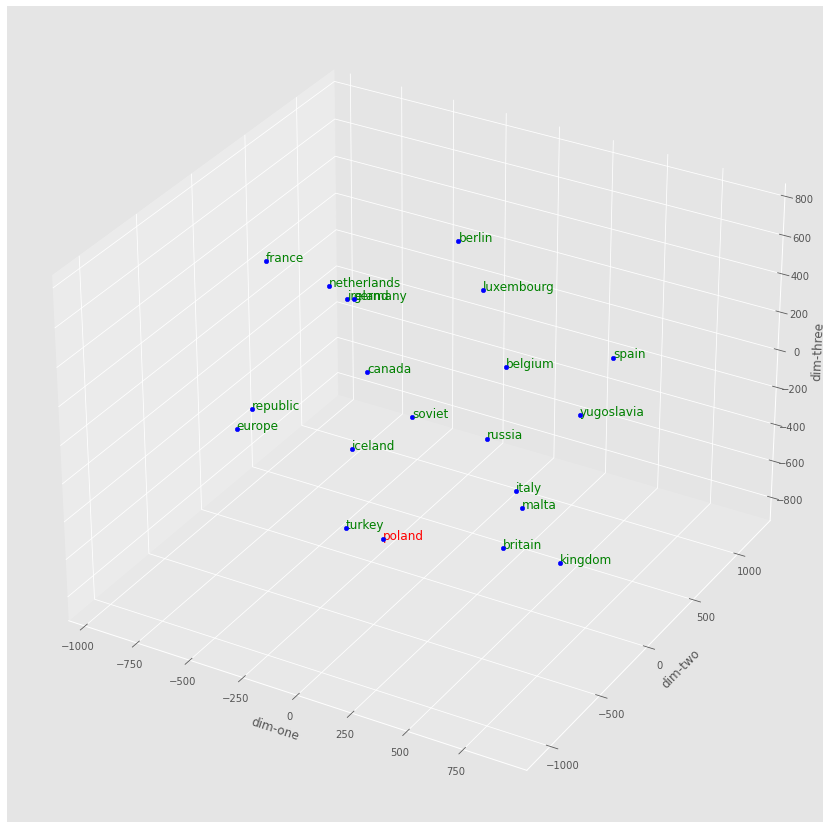

In [61]:
# Ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plot3D_with_labels(word='poland', k=20, model= my_best_rnn)


--- 
<div style="text-align: center"> <span style="color:green">GOOD LUCK WITH YOUR ASSIGNMENT 2!</span> </div>
<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>